In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

In [3]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

                       Date        Open        High         Low       Close  \
0 2022-01-21 00:00:00-05:00  133.011993  134.760498  130.001007  130.091995   
1 2022-01-24 00:00:00-05:00  126.027496  130.778503  124.641953  130.371994   
2 2022-01-25 00:00:00-05:00  128.435501  129.338501  126.377998  126.735497   
3 2022-01-26 00:00:00-05:00  130.592499  132.807495  127.153503  129.240005   
4 2022-01-27 00:00:00-05:00  131.360992  132.609955  128.945007  129.121002   

    Adj Close    Volume  
0  130.091995  41920000  
1  130.371994  55148000  
2  126.735497  36008000  
3  129.240005  39630000  
4  129.121002  30248000  


+ Grafik candlestick adalah tools yang berguna untuk menganalisis pergerakan harga dari harga saham. 
+ Berikut inilah cara Anda dapat memvisualisasikan bagan candlestick dari

In [11]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

In [6]:
# Kita tuangkan pergerakan harga saham dalam format grafik 'batang'
figure = px.bar(data, x = "Date", y= "Close")
figure.show()

In [7]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Rangeslider')

# Inilah cara Anda menambahkan range-slider untuk menganalisis pasar saham:
figure.update_xaxes(rangeslider_visible=True)
figure.show()

+ Pemilih periode waktu seperti tombol yang menampilkan grafik periode waktu tertentu. Misalnya, setahun, tiga bulan, enam bulan, dll. Berikut adalah cara menambahkan tombol untuk memilih jangka waktu analisis pasar saham:

In [8]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

+ Akhir pekan atau musim liburan selalu mempengaruhi pasar saham. Jadi, jika Anda ingin menghapus semua catatan tren akhir pekan dari visualisasi pasar saham Anda, berikut cara melakukannya:

In [9]:
figure = px.scatter(data, x='Date', y='Close', range_x=['2022-01-21', '2023-01-21'],
                 title="Stock Market Analysis by Hiding Weekend Gaps")
figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "sun"])
    ]
)
figure.show()

+ Kita akan gunakan analisa data dan deret waktu guna melakukan pengambilan keputusan di masa akan datang
+ Kita gunakan Model ARIMA, teknik statistik yang populer digunakan untuk Peramalan Time Series.
+ Model ARIMA memiliki tiga parameter seperti ARIMA(p, d, q). Di sini p, d, dan q didefinisikan sebagai:

    + 'p' adalah jumlah nilai tertinggal yang perlu ditambahkan atau dikurangi dari nilai (kolom label). Ini menangkap bagian autoregresif dari ARIMA.
    + 'd' mewakili berapa kali data perlu dibedakan untuk menghasilkan sinyal stasioner. Jika berupa data stasioner, nilai d harus 0, dan jika berupa data musiman, nilai d harus 1. d menangkap bagian terintegrasi dari ARIMA.
    + 'q' adalah jumlah nilai yang tertinggal untuk istilah kesalahan yang ditambahkan atau dikurangi dari nilai (kolom label). Ini menangkap bagian rata-rata bergerak dari ARIMA.

In [13]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
# Kita lihat harga saham 5 hari terakhir
print(data.tail())

                         Date       Open       High        Low      Close  \
246 2023-01-13 00:00:00-05:00  91.528000  92.980003  90.930000  92.800003   
247 2023-01-17 00:00:00-05:00  92.779999  92.970001  90.839996  92.160004   
248 2023-01-18 00:00:00-05:00  92.940002  93.587997  91.400002  91.779999   
249 2023-01-19 00:00:00-05:00  91.389999  94.400002  91.379997  93.910004   
250 2023-01-20 00:00:00-05:00  95.949997  99.419998  95.910004  99.279999   

     Adj Close    Volume  
246  92.800003  18617800  
247  92.160004  22935800  
248  91.779999  19641600  
249  93.910004  28707700  
250  99.279999  53610200  


In [14]:
# Kita hanya membutuhkan data 'date' dan 'harga penutupan' pada kolom tersebut:
data = data[["Date","Close"]]
print(data.head())

                       Date       Close
0 2022-01-21 00:00:00-05:00  130.091995
1 2022-01-24 00:00:00-05:00  130.371994
2 2022-01-25 00:00:00-05:00  126.735497
3 2022-01-26 00:00:00-05:00  129.240005
4 2022-01-27 00:00:00-05:00  129.121002


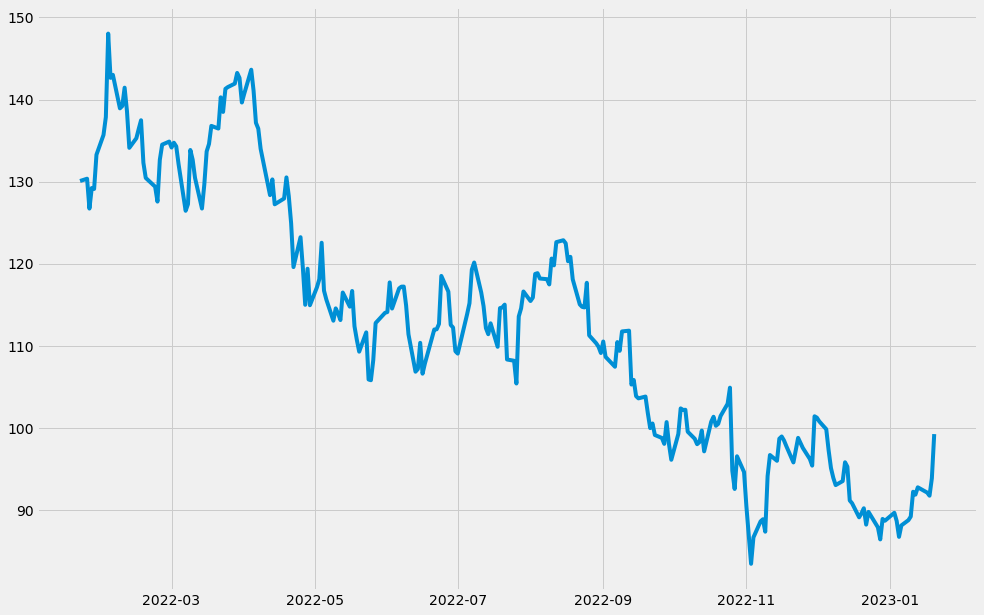

In [15]:
# Mari kita visualize harga penutupan di Google sebelum bergerak maju
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])

## Menggunakan ARIMA untuk Time Series Forecasting

/var/folders/yr/2y39k3s915v7rzqtlzqngt3m0000gn/T/ipykernel_33655/4151734692.py:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 432x288 with 0 Axes>

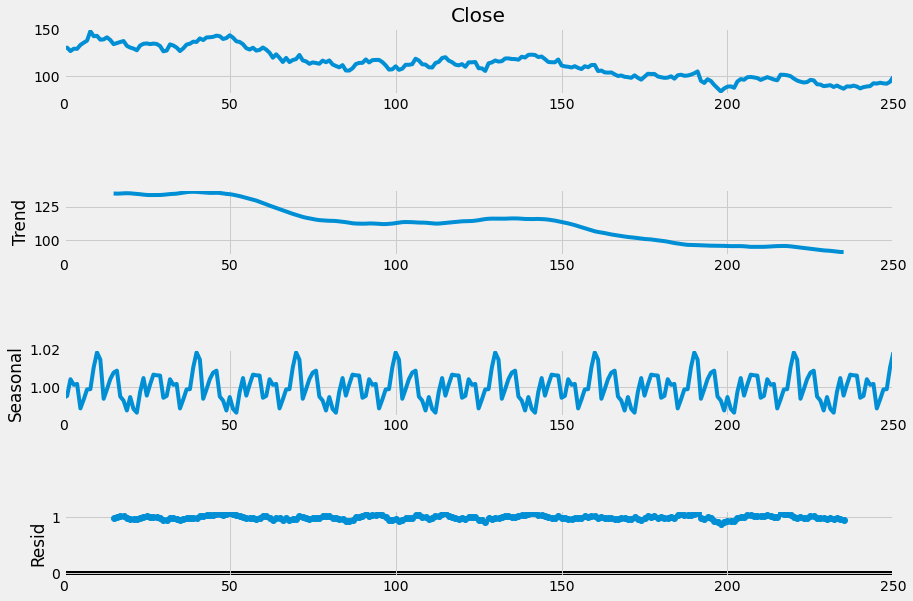

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

+ Jadi data kami tidak stasioner, ini bersifat musiman. Kita perlu menggunakan model Seasonal ARIMA (SARIMA) untuk Time Series Forecasting pada data ini

+ Kita dapat menemukan nilai p dengan memplot autokorelasi kolom Close dan nilai q dengan memplot plot autokorelasi parsial. Nilai d adalah 0 atau 1. 
+ Jika datanya stasioner, kita harus menggunakan 0, dan jika datanya musiman, kita harus menggunakan 1. 
+ Karena data kita musiman, kita harus menggunakan 1 sebagai nilai d.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

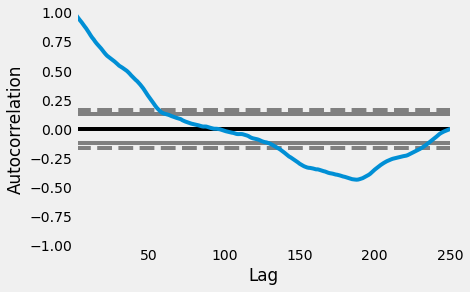

In [17]:
# Inilah cara mencari nilai p:
pd.plotting.autocorrelation_plot(data["Close"])

+ Dalam plot autokorelasi di atas, kurva bergerak ke bawah setelah garis ke-5 dari batas pertama. Itulah cara menentukan nilai-p. Maka nilai p adalah 5. Sekarang mari kita cari nilai q (rata-rata bergerak):

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



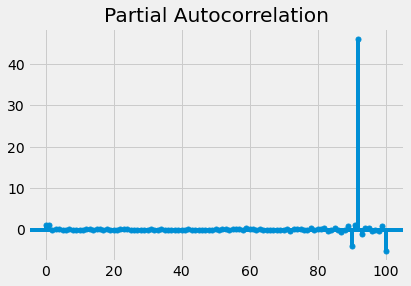

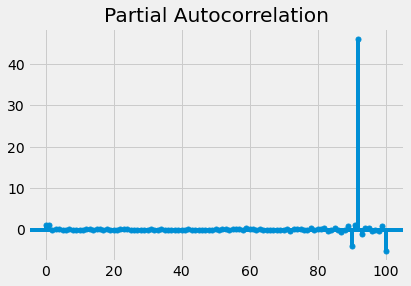

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [20]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -604.533
Method:                       css-mle   S.D. of innovations              2.703
Date:                Sat, 21 Jan 2023   AIC                           1227.067
Time:                        17:34:56   BIC                           1258.760
Sample:                             1   HQIC                          1239.822
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1828      0.026     -7.015      0.000      -0.234      -0.132
ar.L1.D.Close     0.0076      0.262      0.029      0.977      -0.506       0.521
ar.L2.D.Close     0.8210      0.241     

In [21]:
# Kita mulai prediksi nilai dengan menggunakan ARIMA

predictions = fitted.predict()
print(predictions)

2     -0.202354
3     -0.052738
4     -0.158930
5     -0.127599
6     -0.414143
         ...   
246   -0.365087
247   -0.468795
248   -0.410573
249   -0.292378
250   -0.569368
Length: 249, dtype: float64


+ Nilai prediksi salah karena data bersifat musiman. Model ARIMA tidak akan pernah bekerja dengan baik pada data deret waktu musiman. Jadi, inilah cara membuat model SARIMA:

In [22]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49207D+00    |proj g|=  9.11663D-02


 This problem is unconstrained.



At iterate    5    f=  2.42778D+00    |proj g|=  1.58200D-02

At iterate   10    f=  2.42271D+00    |proj g|=  5.68741D-02

At iterate   15    f=  2.38664D+00    |proj g|=  3.15866D-02

At iterate   20    f=  2.37690D+00    |proj g|=  6.44942D-03

At iterate   25    f=  2.37616D+00    |proj g|=  2.22585D-03

At iterate   30    f=  2.37478D+00    |proj g|=  3.25279D-02

At iterate   35    f=  2.37333D+00    |proj g|=  4.35697D-02

At iterate   40    f=  2.37277D+00    |proj g|=  8.47184D-03

At iterate   45    f=  2.37209D+00    |proj g|=  1.28483D-02


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  2.37150D+00    |proj g|=  3.79938D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     67      1     0     0   3.799D-02   2.372D+00
  F =   2.3715018783748749     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -595.247
Date:                            Sat, 21 Jan 2023   AIC                           1220.4

In [23]:
# Sekarang mari kita prediksi harga saham yang akan datang dengan menggunakan model SARIMA untuk 10 hari ke depan:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    97.929034
252    97.601231
253    96.826796
254    96.342808
255    96.412059
256    96.253654
257    95.371735
258    95.128358
259    95.470655
260    95.866546
261    95.823944
Name: predicted_mean, dtype: float64


<AxesSubplot:>

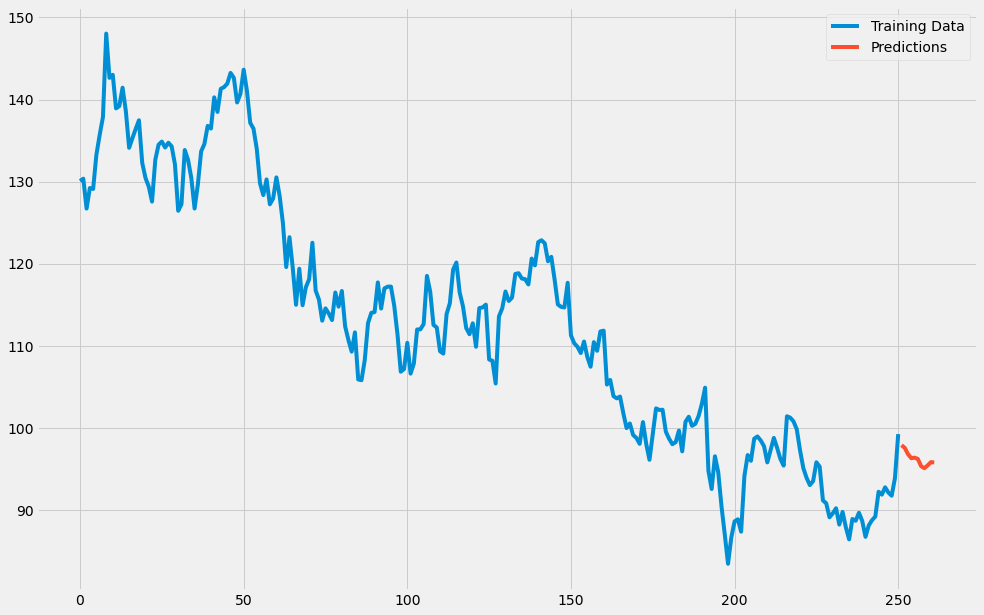

In [24]:
# Plot Prediction
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")